<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# Проект «Анализ вакансий из HeadHunter»
   

In [3]:
import pandas as pd
import psycopg2
import warnings
warnings.filterwarnings("ignore")

In [4]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python
DBNAME = ''
USER = ''
PASSWORD = ''
HOST = ''
PORT = 5432

In [5]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

## 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в базе (вакансии находятся в таблице `vacancies`).

In [8]:
# текст запроса
query_3_1 = f'''
SELECT COUNT(*) FROM vacancies;
'''

df_3_1 = pd.read_sql_query(query_3_1, connection)

In [9]:
# результат запроса
df_3_1

,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица `employers`).

In [11]:
# текст запроса
query_3_2 = f'''
SELECT COUNT(*) FROM employers;
'''

df_3_2 = pd.read_sql_query(query_3_2, connection)

In [12]:
# результат запроса
df_3_2 

,count
0,23501


3. Посчитайте с помощью запроса количество регионов (таблица `areas`).

In [14]:
# текст запроса
query_3_3 = f'''
SELECT COUNT(*) FROM areas;
'''

df_3_3 = pd.read_sql_query(query_3_3, connection)

In [15]:
# результат запроса
df_3_3

,count
0,1362


4. Посчитайте с помощью запроса количество сфер деятельности в базе (таблица `industries`).

In [17]:
# текст запроса
query_3_4 = f'''
SELECT COUNT(*) FROM industries;
'''

df_3_4 = pd.read_sql_query(query_3_4, connection)

In [18]:
# результат запроса
df_3_4

,count
0,294


***

### Выводы по предварительному анализу данных
количество вакансий : 49197

количество работодателей : 23501

количество регионов : 1362

количество сфер деятельности : 294

## 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (`cnt`) вакансий в каждом регионе (`area`).
Отсортируйте по количеству вакансий в порядке убывания.

In [23]:
# текст запроса
query_4_1 = f'''
SELECT a.name AS area, COUNT(*) as cnt
FROM vacancies v
JOIN areas a ON v.area_id = a.id    -- Соединение таблиц vacancies и areas по полю area_id
GROUP BY a.name  -- Соединение таблиц vacancies и areas по полю area_id
ORDER BY cnt DESC;  -- Сортировка по убыванию количества вакансий
'''

df_4_1 = pd.read_sql_query(query_4_1, connection)


In [24]:
# результат запроса
df_4_1

,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [26]:
# текст запроса
query_4_2 = f'''
SELECT COUNT(*)
FROM vacancies
/* Условия фильтрации: хотя бы одно поле - с минимальнаой зарплата, либо с максимальной зарплатой должна быть не равна NULL */
WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL; 
'''

df_4_2 = pd.read_sql_query(query_4_2, connection)

In [27]:
# результат запроса
df_4_2

,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до **целого числа**.

In [29]:
# текст запроса
query_4_3 = f'''
SELECT 
    ROUND(AVG(salary_from)) AS avg_min_salary,  -- Среднее значение минимальной зарплаты, округленное до целого числа
    ROUND(AVG(salary_to)) AS avg_max_salary  -- Среднее значение максимальной зарплаты, округленное до целого числа
FROM vacancies;
'''

df_4_3 = pd.read_sql_query(query_4_3, connection)


In [30]:
# результат запроса
df_4_3

,avg_min_salary,avg_max_salary
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (`schedule`) и типа трудоустройства (`employment`), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [32]:
# текст запроса
query_4_4 = f'''
SELECT 
    schedule, -- Графики работы      
    employment, -- Формы занятости     
    COUNT(*) AS count -- Количество вакансий
FROM vacancies
GROUP BY schedule, employment  -- группирвока по  сочетания графика работы и формы занятости
ORDER BY count DESC;  -- Сортировка по убыванию количества вакансий
'''

df_4_4 = pd.read_sql_query(query_4_4, connection)

In [33]:
# результат запроса
df_4_4

,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля «Требуемый опыт работы» (`experience`) в порядке возрастания количества вакансий, в которых указан данный вариант опыта.

In [35]:
# текст запроса
query_4_5 = f'''
SELECT 
    experience,     -- Уровень опыта работы
    COUNT(*) AS cnt -- Количество вакансий для каждого уровня опыта
FROM vacancies
GROUP BY experience -- Группировка по уровню опыта
ORDER BY cnt ASC;  -- Сортировка по возрастанию количества вакансий
'''

df_4_5 = pd.read_sql_query(query_4_5, connection)

In [36]:
# результат запроса
df_4_5

,experience,cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

### Выводы по детальному анализу вакансий
В результате анализа мы узнали, что:
1) Пятёрка лидеров по количеству вакансий: Москва, Санкт-Петербург, Минск, Новосибирск, Алматы
2) Заполнено хотя бы одно из двух полей с зарплатой у 24073 вакансий
3) Нижняя граница зарплатной вилки: 71065  , верхняя граница зарплатной вилки: 110537
4) Наиболее популярные сочетания типа рабочего графика (schedule) и типа трудоустройства (employment):
Полный день + Полная занятость - 35367, Удаленная работа + Полная занятость  - 7802,
Гибкий график + Полная занятость - 1593, Удаленная работа + Частичная занятость - 1312, Сменный график + Полная занятость - 940
5) Требуемый опыт работы, в порядке возрастания количества вакансий, в которых указан данный вариант опыта выглядит следующим образом:
     *       Более 6 лет        1337
     *         Нет опыта        7197
     *      От 3 до 6 лет       14511
     *      От 1 года до 3 лет  26152

## 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [41]:
# текст запроса
query_5_1 = f'''
SELECT 
    employers.id, -- Идентификатор работодателя
    employers.name, -- Имя работодателя
    COUNT(vacancies.id) AS num_vacancies -- Количество вакансий для данного работодателя
FROM employers
JOIN vacancies ON employers.id = vacancies.employer_id
GROUP BY employers.id, employers.name
ORDER BY num_vacancies DESC; -- Сортировка по убыванию количества вакансий
     '''

df_5_1 = pd.read_sql_query(query_5_1, connection)
    

In [42]:
# результат запроса
df_5_1


,id,name,num_vacancies
0,1740,Яндекс,1933
1,2748,Ростелеком,491
2,78638,Тинькофф,444
3,3529,СБЕР,428
4,39305,Газпром нефть,331
...,...,...,...
14901,4868743,Евсеев Сергей Владимирович,1
14902,1620,Кадровые технологии,1
14903,3253186,ЛОМБАРД 24,1
14904,592461,Авто-Компонент ТД,1


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [44]:
# текст запроса

query_5_2_1 = f'''
/* Основная часть запроса, выборка названия региона и количества работодателей/вакансий */
SELECT a.name AS region_name,
    /* Если количество работодателей отсутствует, заменяем его на 0 */
    CASE 
        WHEN ec.employer_count IS NULL 
            THEN 0 
        ELSE 
            ec.employer_count 
    END 
    AS employer_count,
    /* Если количество вакансий отсутствует, заменяем его на 0 */
    CASE 
        WHEN vc.vacancy_count IS NULL 
            THEN 0 
        ELSE
            vc.vacancy_count 
    END 
    AS vacancy_count
FROM areas a
/* Левое соединение с подзапросом для получения количества работодателей по регионам */
LEFT JOIN (
    SELECT e.area, COUNT(*) AS employer_count
    FROM employers e
    GROUP BY e.area
) ec ON a.id = ec.area
/* Левое соединение с подзапросом для получения количества вакансий по регионам */
LEFT JOIN (
    SELECT v.area_id, COUNT(*) AS vacancy_count
    FROM vacancies v
    GROUP BY v.area_id
) vc ON a.id = vc.area_id
/* Сортировка по убыванию количества работодателей и вакансий */
ORDER BY employer_count DESC, vacancy_count DESC;
'''

df_5_2_1 = pd.read_sql_query(query_5_2_1, connection)


query_5_2_2 = f'''
-- Запрашиваем названия  регионов и количество работодателей в них
SELECT 
    a.name AS region_name, 
    ec.employer_count
FROM areas a
/* Внутренний подзапрос для группировки работодателей по регионам и подсчета их количества */
INNER JOIN (
    SELECT 
        e.area, 
        COUNT(*) AS employer_count
    FROM employers e
    GROUP BY e.area
) ec ON a.id = ec.area
-- Левое соединение с таблицей вакансий для проверки наличия вакансий в регионах
LEFT JOIN vacancies v ON a.id = v.area_id
-- Группировка результатов по названию регион и количеству работодателей
GROUP BY a.name, ec.employer_count
-- Условие для выбора регионов, в которых нет вакансий
HAVING COUNT(v.id) = 0
-- Сортировка по убыванию количества работодателей
ORDER BY ec.employer_count DESC
'''    
df_5_2_2 = pd.read_sql_query(query_5_2_2, connection)

In [45]:
# результат запроса
df_5_2_1

,region_name,employer_count,vacancy_count
0,Москва,5864,5333
1,Санкт-Петербург,2217,2851
2,Минск,1115,2112
3,Алматы,721,1892
4,Екатеринбург,609,1698
...,...,...,...
1357,Нововоронеж,0,0
1358,Пролетарск,0,0
1359,Серебрянск,0,0
1360,Бирюч,0,0


In [46]:
df_5_2_2

,region_name,employer_count
0,Россия,410
1,Казахстан,207
2,Московская область,75
3,Краснодарский край,19
4,Беларусь,18
...,...,...
181,Угольные Копи,1
182,Сморгонь,1
183,Атбасар,1
184,Черлак (Омская область) \t,1


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [48]:
# текст запроса
query_5_3 = f'''
SELECT 
    e.name AS employer_name,                   -- Выбор названия работодателя из таблицы employers 
    COUNT(DISTINCT v.area_id) AS regions_count -- Подсчет количество уникальных регионов вакансий
FROM employers e   
JOIN vacancies v ON e.id = v.employer_id   -- Объединение таблицы по ID работодателя
GROUP BY e.name    -- Группировка результаты по названию работодателя
ORDER BY regions_count DESC;  -- Сортировка по количеству регионов по убыванию
'''

df_5_3 = pd.read_sql_query(query_5_3, connection)

In [49]:
# результат запроса
df_5_3

,employer_name,regions_count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности.

In [51]:
# текст запроса
query_5_4 = f'''
SELECT COUNT(*)   -- Подсчитать количество работодателей
FROM employers e  -- Из таблицы работодателей
WHERE NOT EXISTS (   -- Условие, которое проверяет, есть ли записи в связанной таблице
    SELECT 1  -- проверка факта существования записи
    FROM employers_industries ei  -- Из таблицы связей работодателей с отраслями (employers_industries)
    WHERE e.id = ei.employer_id  -- Связать таблицы по ID работодателя
);
'''

df_5_4 = pd.read_sql_query(query_5_4, connection)

In [52]:
# результат запроса
df_5_4

,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности.

In [54]:
# текст запроса
query_5_5 = f'''
SELECT e.name AS employer_name
FROM employers e
JOIN (
    SELECT 
        ei.employer_id, 
        COUNT(*) AS industry_count
    FROM employers_industries ei
    GROUP BY ei.employer_id   -- Группировка результатов по ID работодателя
    HAVING COUNT(*) = 4  -- Фильтрация работодателей, у которых количество отраслей равно 4
) AS industry_counts ON e.id = industry_counts.employer_id  -- Объединение таблицу employers с отфильтрованными данными по ID работодателя
ORDER BY e.name  -- Сортировка результаты по названию работодателя
LIMIT 1 OFFSET 2;  -- Возврат 1 строки, начиная с третьего результата (смещение 2)
'''

df_5_5 = pd.read_sql_query(query_5_5, connection)


In [55]:
# результат запроса
df_5_5

,employer_name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана «Разработка программного обеспечения».


In [57]:
# текст запроса
query_5_6 = f'''
SELECT COUNT(DISTINCT ei.employer_id)  -- Подсчитать количество уникальных ID работодателей
FROM employers_industries ei  -- Из таблицы связей работодателей и отраслей
JOIN industries i ON ei.industry_id = i.id   -- Объединить таблицы по ID отрасли
WHERE i.name = 'Разработка программного обеспечения'; -- Отфильтровать только отрасль "Разработка программного обеспечения"
'''

df_5_6 = pd.read_sql_query(query_5_6, connection)

In [58]:
# результат запроса
df_5_6

,count
0,3553


7. Для компании «Яндекс» выведите список [городов-миллионников](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8), в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку "Total" с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

    Если возникнут трудности с этим заданием, посмотрите материалы модуля 6.4 «Как получать данные из веб-источников и API».

In [60]:
# код для получения списка городов-милионников
url='https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8#%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D0%BE%D0%B2'
data = pd.read_html(url)
city_df = data[0]
city_list = list(city_df['Город'])
city_tuple = tuple(city_list)


In [61]:
city_tuple

('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Красноярск',
 'Нижний Новгород',
 'Челябинск',
 'Уфа',
 'Самара',
 'Ростов-на-Дону',
 'Краснодар',
 'Омск',
 'Воронеж',
 'Пермь',
 'Волгоград')

In [62]:
# текст запроса

query_5_7 = f'''
/* Создаем временную таблицу CityCounts для хранения подсчитанного количества вакансий по городам */
WITH CityCounts AS (
  SELECT
    a.name AS city,  -- Выбираем название города из таблицы areas (a) и переименовываем его в "city"
    COUNT(*) AS vacancy_count  -- Считаем количество вакансий для каждой группы
  FROM
    vacancies v  -- Таблица вакансий
  JOIN employers e ON v.employer_id = e.id  -- Объединяем таблицы vacancies и employers по полю employer_id
  JOIN areas a ON v.area_id = a.id  -- Объединяем таблицы vacancies и areas по полю area_id
  WHERE
    e.name = 'Яндекс'  -- Фильтруем вакансии только для компании "Яндекс"
  AND a.name IN {city_tuple}  -- Фильтруем вакансии по городам, указанным в списке city_tuple
  GROUP BY a.name  -- Группируем данные по названию города
)
-- Выбираем данные из временной таблицы CityCounts
SELECT
  city,  -- Выбираем поле "city" из временной таблицы
  vacancy_count  -- Выбираем поле "vacancy_count" из временной таблицы
FROM
  CityCounts
-- Объединяем результаты с итоговой строкой, показывающей общее количество вакансий
UNION ALL
SELECT
  'Total',  -- Добавляем строку "Total" для общего количества
  SUM(vacancy_count) AS total_count  -- Считаем суммарное количество вакансий по всем городам
FROM
  CityCounts
ORDER BY vacancy_count ASC; -- Сортируем результаты по количеству вакансий по возрастанию
'''


df_5_7 = pd.read_sql_query(query_5_7, connection)

In [63]:
# результат запроса
df_5_7

,city,vacancy_count
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Пермь,25.0
5,Казань,25.0
6,Ростов-на-Дону,25.0
7,Самара,26.0
8,Уфа,26.0
9,Краснодар,30.0


***

### Выводы по анализу работодателей
1. выявлено распределение количества вакансий по работодателям.
2. выявлено количество работодателей и вакансий для каждого региона.
3. для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии.
4. подсчитано количество работодателей, у которых не указана сфера деятельности.
5. составлен алфавитный список (по названию) компаний, у которых указано четыре сферы деятельности.
6. выяснено, у какого количества работодателей в качестве сферы деятельности указана «Разработка программного обеспечения».
7. для компании «Яндекс» выведен список городов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах и  с общим количеством вакансий компании, собранных в этой таблице. 

## 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

    Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова `'data'` или `'данн'`.

    *Обратите внимание, что названия вакансий могут быть написаны в любом регистре.*


In [68]:
# текст запроса
query_6_1 = f'''
SELECT COUNT(*)  -- Подсчитать общее количество вакансий
FROM vacancies  -- Из таблицы вакансий
WHERE LOWER(name) LIKE '%data%'  -- Фильтр по ключевому слову "data" (независимо от регистра)
    OR LOWER(name) LIKE '%данн%';  -- Фильтр по ключевому слову "данн" (независимо от регистра)
'''

df_6_1 = pd.read_sql_query(query_6_1, connection)


In [69]:
# результат запроса
df_6_1

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
    * 'data scientist'
    * 'data science'
    * 'исследователь данных'
    * 'ML' (здесь не нужно брать вакансии по HTML)
    * 'machine learning'
    * 'машинн%обучен%'

    **В следующих заданиях мы продолжим работать с вакансиями по этому условию.**

    Считаем вакансиями для специалистов уровня Junior следующие:
    + в названии есть слово “junior” **или**
    + требуемый опыт — «Нет опыта» **или**
    + тип трудоустройства — «Стажировка».


In [71]:
# текст запроса
query_6_2 = f'''
SELECT COUNT(*)  -- Подсчитать общее количество вакансий
FROM vacancies  -- Из таблицы вакансий
WHERE (
    /* Условия для поиска вакансий в области Data Science и Machine Learning: */
    LOWER(name) LIKE '%data scientist%' OR 
    LOWER(name) LIKE '%data science%' OR 
    LOWER(name) LIKE '%исследователь данных%' OR 
    (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR -- Исключаем вакансии, связанные с HTML
    LOWER(name) LIKE '%machine learning%' OR 
    LOWER(name) LIKE '%машинн%обучен%' 
)
AND (
    /* Условия для поиска вакансий для начинающих специалистов: */
    LOWER(name) LIKE '%junior%' OR 
    experience = 'Нет опыта' OR 
    employment = 'Стажировка'
);
'''

df_6_2 = pd.read_sql_query(query_6_2, connection)


In [72]:
# результат запроса
df_6_2

,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или Postgres?

    *Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [74]:
# текст запроса
query_6_3 = f'''
SELECT COUNT(*)  -- Подсчитать общее количество вакансий
FROM vacancies  -- Из таблицы вакансий
WHERE (
    /* Условия для поиска вакансий в области Data Science и Machine Learning: */
    LOWER(name) LIKE '%data scientist%' OR 
    LOWER(name) LIKE '%data science%' OR 
    LOWER(name) LIKE '%исследователь данных%' OR 
    (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR -- Исключаем вакансии, связанные с HTML
    LOWER(name) LIKE '%machine learning%' OR 
    LOWER(name) LIKE '%машинн%обучен%' 
)
AND (
    /* Условия для поиска вакансий, требующих навыков работы с SQL или PostgreSQL: */
    LOWER(key_skills) LIKE '%sql%' OR 
    LOWER(key_skills) LIKE '%postgres%' 
);

'''

df_6_3 = pd.read_sql_query(query_6_3, connection)

In [75]:
# результат запроса
df_6_3

,count
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS. Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

    *Это можно сделать помощью запроса, аналогичного предыдущему.*

In [77]:
# текст запроса
query_6_4 = f'''
SELECT COUNT(*)  -- Подсчитать общее количество вакансий
FROM vacancies  -- Из таблицы вакансий
WHERE (
    /* Условия для поиска вакансий в области Data Science и Machine Learning: */
    LOWER(name) LIKE '%data scientist%' OR 
    LOWER(name) LIKE '%data science%' OR 
    LOWER(name) LIKE '%исследователь данных%' OR 
    (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR -- Исключаем вакансии, связанные с HTML
    LOWER(name) LIKE '%machine learning%' OR 
    LOWER(name) LIKE '%машинн%обучен%' 
)
AND (
    /* Условие для поиска вакансий, требующих навыков программирования на Python: */
    LOWER(key_skills) LIKE '%python%' 
)
'''

df_6_4 = pd.read_sql_query(query_6_4, connection)

In [78]:
# результат запроса
df_6_4

,count
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до **двух знаков после точки-разделителя**.

In [80]:
# текст запроса
query_6_5 = f'''
SELECT
    /* Округление среднего количества навыков до двух знаков после запятой */
    ROUND(
        AVG(
            /* Вычисление количества навыков, разделенных символом табуляции (CHR(9)) */
            LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '')) + 1
        ),
        2
    ) AS avg_key_skills,
    COUNT(*) AS total_vacancies -- Подсчёт общего количества вакансий
FROM public.vacancies
WHERE
    /* Фильтр по ключевым словам в названии вакансии */
    (LOWER(name) LIKE '%data scientist%' -- Включаем вакансии с упоминанием "data scientist"
     OR LOWER(name) LIKE '%data science%' -- Или "data science"
     OR LOWER(name) LIKE '%исследователь данных%' -- Или "исследователь данных"
     OR (name LIKE '% ML %' AND name NOT LIKE '%HTML%') -- Или "ML", исключая HTML
     OR LOWER(name) LIKE '%machine learning%' -- Или "machine learning"
     OR LOWER(name) LIKE '%машинн%обучен%') -- Или "машинное обучение"
     
    /* Исключаем вакансии без ключевых навыков  */
    AND key_skills IS NOT NULL
    AND key_skills != '';
'''
df_6_5 = pd.read_sql_query(query_6_5, connection)

In [81]:
# результат запроса
df_6_5

,avg_key_skills,total_vacancies
0,6.41,352


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в среднем указывают для каждого типа требуемого опыта (уникальное значение из поля `experience`).

    При решении задачи примите во внимание следующее:
    1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
    2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
    3. Если в расчётах участвует `null`, в результате он тоже даст `null` (посмотрите, что возвращает запрос `select 1 + null`). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит `null` на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

    Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до **целого числа**.

In [83]:
# текст запроса
query_6_6 = f'''
SELECT 
    experience, 
    ROUND(AVG(calculated_salary)) AS average_salary  -- Вычислить среднюю зарплату, округлить результат
FROM (
    SELECT 
        experience,  
        CASE
            WHEN COALESCE(salary_from,0) <> 0 AND COALESCE(salary_to,0) <> 0 
                THEN (COALESCE(salary_from,0) + COALESCE(salary_to,0)) / 2  -- Если указаны и salary_from и salary_to, вычислить среднее
            WHEN COALESCE(salary_from,0) <> 0 
                THEN COALESCE(salary_from,0)  -- Если указан только salary_from, использовать его
            WHEN COALESCE(salary_to,0) <> 0 
                THEN COALESCE(salary_to,0)  -- Если указан только salary_to, использовать его
            ELSE 
                0  -- Если ни salary_from, ни salary_to не указаны, использовать 0
        END AS calculated_salary  -- Вычисляемое значение зарплаты
    FROM vacancies
    WHERE (
        /* Условия для поиска вакансий в области Data Science и Machine Learning: */
        LOWER(name) LIKE '%data scientist%' OR 
        LOWER(name) LIKE '%data science%' OR 
        LOWER(name) LIKE '%исследователь данных%' OR 
        (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR -- Исключаем вакансии, связанные с HTML
        LOWER(name) LIKE '%machine learning%' OR 
        LOWER(name) LIKE '%машинн%обучен%' 
    )
    AND (COALESCE(salary_from,0) <> 0 OR COALESCE(salary_to,0)<>0)  -- Отфильтровать вакансии, где указана хотя бы одна из зарплат
) AS salaries  -- Внутренний запрос для вычисления calculated_salary

GROUP BY experience  -- Группировать результаты по уровню опыта
ORDER BY average_salary DESC;  -- Сортировать по средней зарплате по убыванию
'''

df_6_6 = pd.read_sql_query(query_6_6, connection)



In [84]:
# результат запроса
print(df_6_6)

           experience  average_salary
0       От 3 до 6 лет        243115.0
1  От 1 года до 3 лет        139675.0
2           Нет опыта         74643.0


***

### Выводы по предметному анализу
1. Выявлено, сколько вакансий имеет отношение к данным  - 1771
2. Выявлено, сколько есть подходящих вакансий для начинающего дата-сайентиста - 51
3. Выявлено, сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или Postgres - 201
4. Вычислено количество вакансий, в которых в качестве ключевого навыка указан Python -351
5. Выявлено, сколько ключевых навыков в среднем указывают в вакансиях для DS  - 6.41
6. Выявлено,  какую зарплату для DS в среднем указывают для каждого типа требуемого опыта


Нужно заметить, что  найденное количество вакансий, имеющих отношение к данным, приблизительное, в часть запросов попали профессии с упоминаем QML, TeamLead. Ьыли использованы два варианта фильтрации:
 - (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%')
 - (name LIKE '%ML%' AND name NOT LIKE '%HTML%')

## Дополнительные исследования

In [88]:
### наиболее распространенныt профессии

In [89]:
query_7_1 = f'''
SELECT
    v.name AS vacancy_name,
    COUNT(*) AS count
FROM
    vacancies v
GROUP BY
    v.name
ORDER BY count DESC;
'''
df_7_1 = pd.read_sql_query(query_7_1, connection)
df_7_1

,vacancy_name,count
0,Системный администратор,1761
1,Программист 1С,1153
2,Бизнес-аналитик,488
3,Специалист технической поддержки,457
4,Системный аналитик,432
...,...,...
21218,Генеральный менеджер Проекта,1
21219,Ведущий инженер-программист (1С:УПП),1
21220,Главный специалист IT направления,1
21221,Сотрудник Отдела информационных систем,1


In [90]:
### наиболее распространенные ключевые навыки

In [91]:
query_7_2 = f'''
SELECT
    unnest(string_to_array(key_skills, CHR(9))) AS skill,
    COUNT(*) AS count
FROM
    vacancies
GROUP BY
    skill
ORDER BY
    count DESC;
'''
df_7_2 = pd.read_sql_query(query_7_2, connection)
df_7_2

,skill,count
0,SQL,6977
1,Git,4731
2,Английский язык,4525
3,Работа в команде,3923
4,Linux,3747
...,...,...
11376,автоматическое тестирование,1
11377,ISO/IEC 27001,1
11378,Автомобильные кредиты,1
11379,iso 27001,1


## Общий вывод по проекту

Кроме промежуточных выаодов, добавлю пару глобальных результатов
1. Топ-10 наиболее распространенных профессий:
    Системный администратор, Программист 1С, Бизнес-аналитик, Специалист технической поддержки, Системный аналитик
2. Топ-5 наиболее распространенных ключевые навыков:
    SQL, Git, Английский язык, Работа в команде, Linux

Для дальнейшего анализа данных добавлены графики.
    
Также аредлагается провести дальнейший анализ и выявить:
- Влияние размера компании на зарплату: Если есть информация о размере компании, можно сравнить средние зарплаты в крупных и небольших компаниях.
- Тренды на рынке труда: С помощью исторических данных можно отслеживать изменения в спросе на различные профессии и навыки.



In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Топ-20 профессий по количеству вакансий

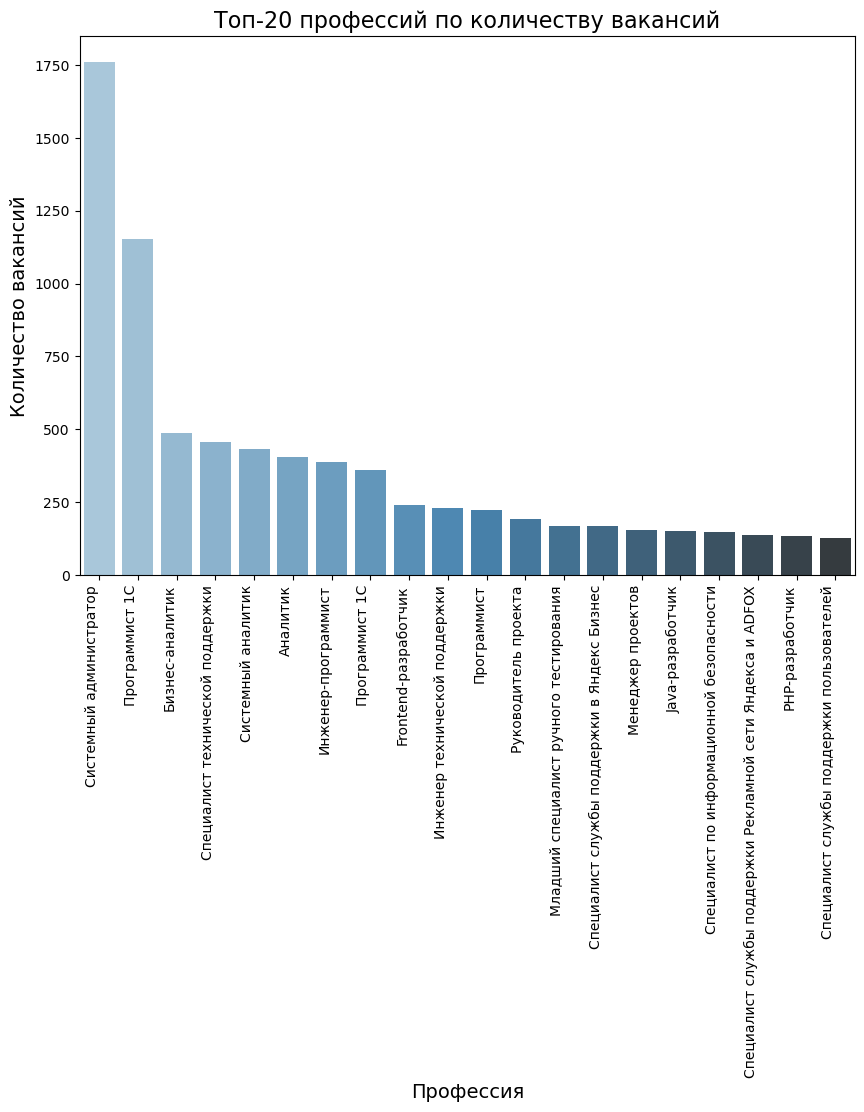

In [166]:
top_20_vacancynames = df_7_1.nlargest(20, columns=['count'])

plt.figure(figsize=(10, 7))
sns.barplot(x='vacancy_name', y='count', data=top_20_vacancynames, palette="Blues_d")
plt.xlabel('Профессия', fontsize=14)
plt.ylabel('Количество вакансий', fontsize=14)
plt.title('Топ-20 профессий по количеству вакансий', fontsize=16)
plt.xticks(rotation=90, ha='right')

plt.show()

#### Топ-20 ключевых навыков по количеству упоминаний

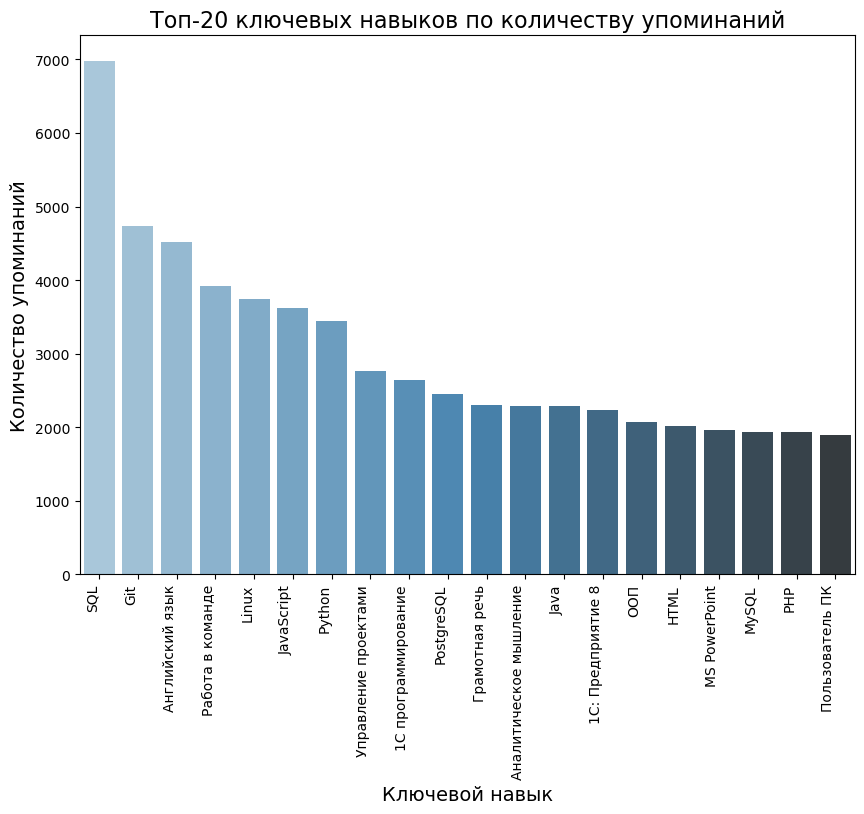

In [169]:
top_20_skills = df_7_2.nlargest(20, columns=['count'])

plt.figure(figsize=(10, 7))
sns.barplot(x='skill', y='count', data=top_20_skills, palette="Blues_d")
plt.xlabel('Ключевой навык', fontsize=14)
plt.ylabel('Количество упоминаний', fontsize=14)
plt.title('Топ-20 ключевых навыков по количеству упоминаний', fontsize=16)
plt.xticks(rotation=90, ha='right')

plt.show()

#### Топ-20 областей по количеству вакансий

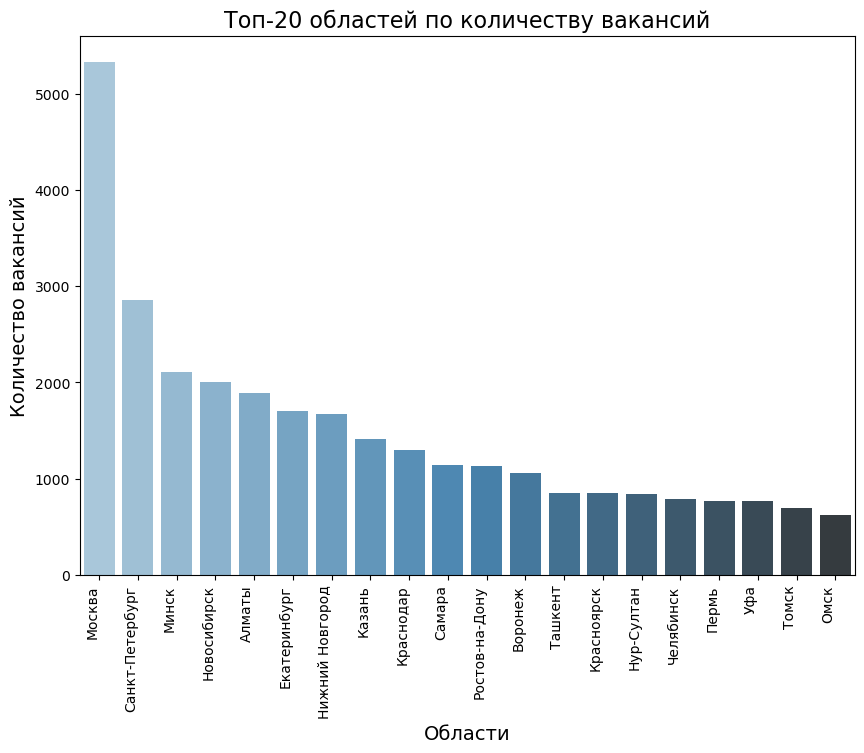

In [95]:
top_20_areas = df_4_1.nlargest(20, columns=['cnt'])

plt.figure(figsize=(10, 7))
sns.barplot(x='area', y='cnt', data=top_20_areas, palette="Blues_d")
plt.xlabel('Области', fontsize=14)
plt.ylabel('Количество вакансий', fontsize=14)
plt.title('Топ-20 областей по количеству вакансий', fontsize=16)
plt.xticks(rotation=90, ha='right')

plt.show()

#### Распределение  средних зарплат

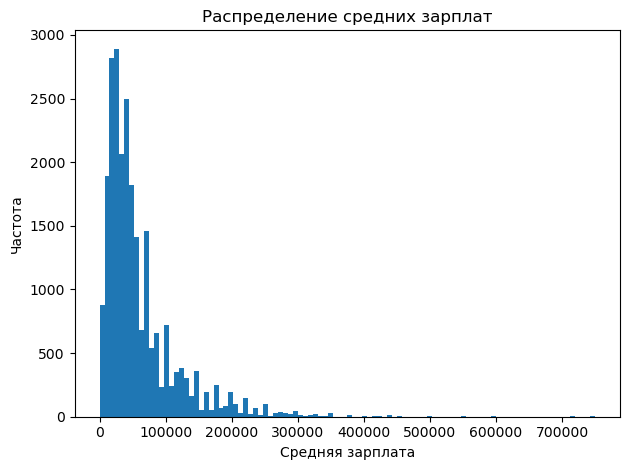

In [97]:
query = f'''
SELECT salary_from, salary_to
FROM vacancies
WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL;
'''
df = pd.read_sql_query(query, connection)
df['avg_salary'] = (df['salary_from'].fillna(0) + df['salary_to'].fillna(0)) / 2

# Построение графика распределения средних зарплат
fig, ax = plt.subplots()
ax.hist(df['avg_salary'], bins=100)
ax.set_xlabel('Средняя зарплата')
ax.set_ylabel('Частота')
ax.set_title('Распределение средних зарплат')

plt.tight_layout()
plt.show()

#### Топ-20 работодателей по количеству вакансий

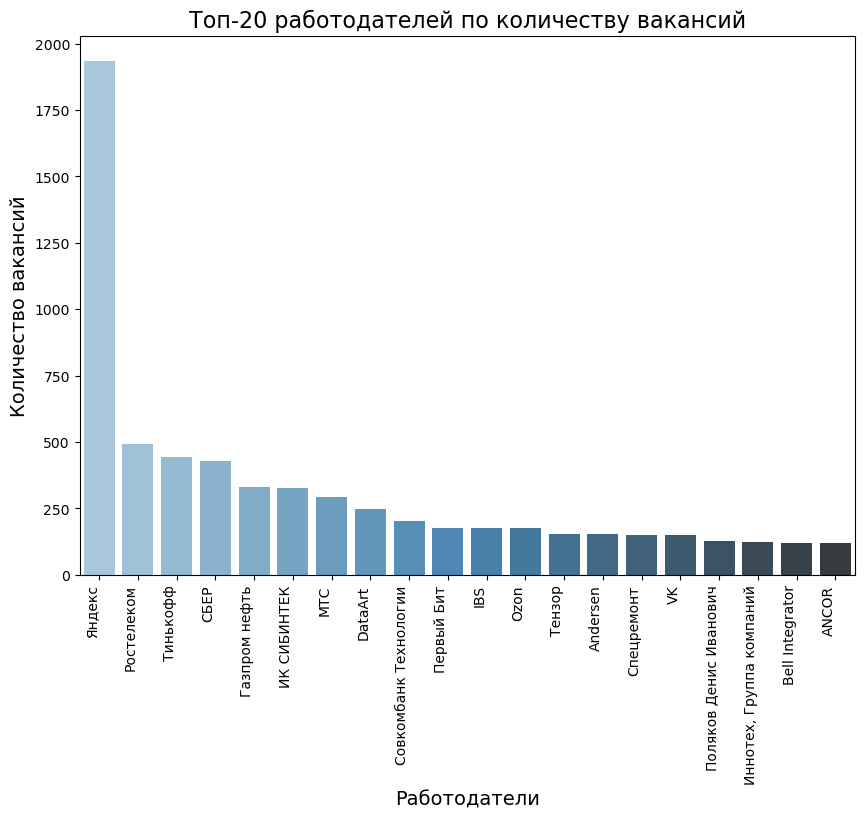

In [99]:
top_20_areas = df_5_1.nlargest(20, columns=['num_vacancies'])

plt.figure(figsize=(10, 7))
sns.barplot(x='name', y='num_vacancies', data=top_20_areas, palette="Blues_d")
plt.xlabel('Работодатели', fontsize=14)
plt.ylabel('Количество вакансий', fontsize=14)
plt.title('Топ-20 работодателей по количеству вакансий', fontsize=16)
plt.xticks(rotation=90, ha='right')

plt.show()

#### Количество вакансий компании «Яндекс» по городам-миллионикам

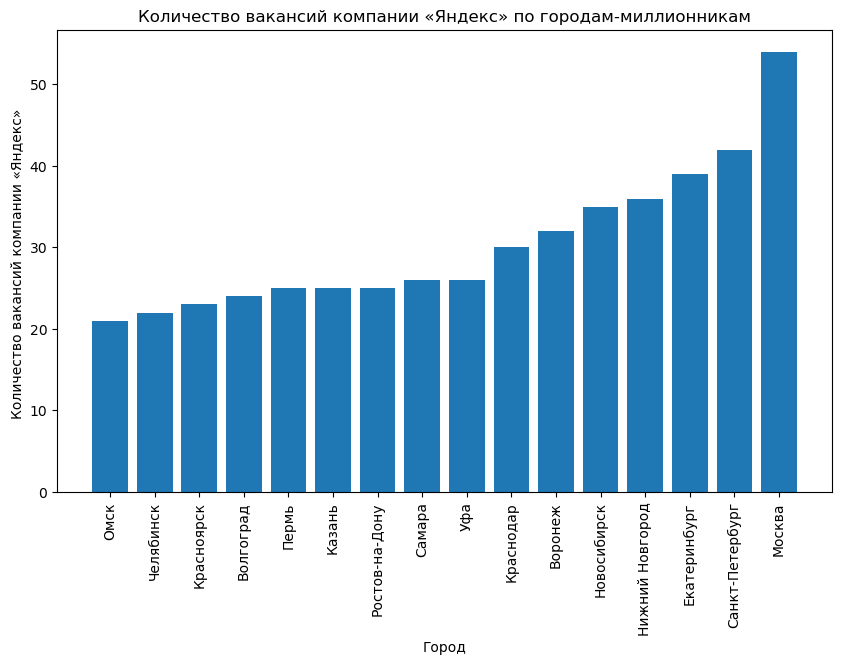

In [101]:
df_5_7_filtered = df_5_7[df_5_7['city'] != 'Total']

plt.figure(figsize=(10, 6))
plt.bar(df_5_7_filtered['city'], df_5_7_filtered['vacancy_count'])
plt.xlabel('Город')
plt.ylabel('Количество вакансий компании «Яндекс» ')
plt.title('Количество вакансий компании «Яндекс» по городам-миллионникам')
plt.xticks(rotation=90)  # Поворот меток городов для лучшей читаемости
plt.show()

In [102]:
connection.close()